512W x 512H 2D Image with 3 channels
150W x 225H 2D Image with 3 channels


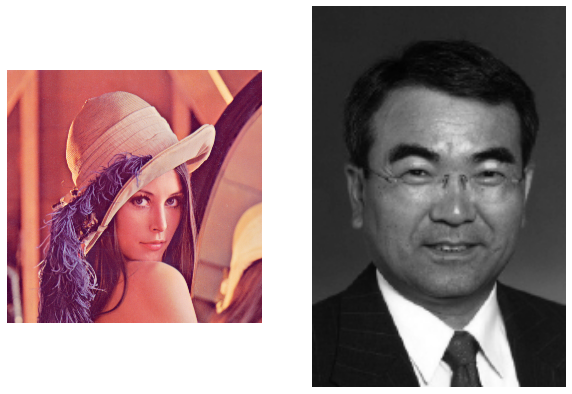

In [7]:
%matplotlib inline
import menpo.io as mio
import matplotlib.pyplot as plt
from menpo.transform import ThinPlateSplines, PiecewiseAffine


lenna = mio.import_builtin_asset( "lenna.png" )
plt.subplot( 121 )
print( lenna );
lenna.view();

takeo = mio.import_builtin_asset( "takeo.ppm" )
plt.subplot( 122 )
print( takeo )
takeo.view();


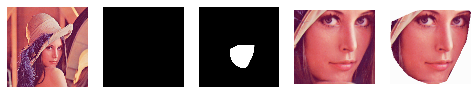

In [8]:
lenna_masked = lenna.as_masked()
plt.subplot( 161 )
lenna_masked.view();
plt.subplot(162)
lenna_masked.mask.view();

lenna_masked_constrained = lenna_masked.constrain_mask_to_landmarks();
plt.subplot( 163 )
lenna_masked_constrained.mask.view();

lenna_masked_constrained_cropped = lenna_masked_constrained.crop_to_landmarks();
plt.subplot( 164 )
lenna_masked_constrained_cropped.view( masked = False );

plt.subplot( 165 )
lenna_masked_constrained_cropped.view();



lenna = lenna_masked_constrained_cropped


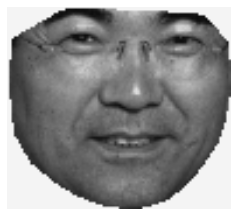

In [9]:
takeo_masked_constrained_cropped = takeo.as_masked().constrain_mask_to_landmarks().crop_to_landmarks();
takeo = takeo_masked_constrained_cropped
takeo.view( figure_size=(4, 4) );


In [10]:
tps_lenna_to_takeo = ThinPlateSplines(lenna.landmarks['LJSON'].lms, takeo.landmarks['PTS'].lms)
pwa_lenna_to_takeo = PiecewiseAffine(lenna.landmarks['LJSON'].lms, takeo.landmarks['PTS'].lms)

tps_takeo_to_lenna = ThinPlateSplines(takeo.landmarks['PTS'].lms, lenna.landmarks['LJSON'].lms)
pwa_takeo_to_lenna = PiecewiseAffine(takeo.landmarks['PTS'].lms, lenna.landmarks['LJSON'].lms)


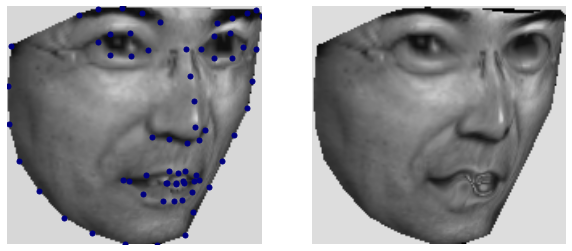

In [11]:

warped_takeo_to_lenna_pwa = takeo.as_unmasked(copy=False).warp_to_mask(lenna.mask, pwa_lenna_to_takeo)
warped_takeo_to_lenna_tps = takeo.as_unmasked(copy=False).warp_to_mask(lenna.mask, tps_lenna_to_takeo)
plt.subplot( 121 )
warped_takeo_to_lenna_pwa.view_landmarks();
plt.subplot( 122 )
warped_takeo_to_lenna_tps.view(); #tps does not have landmarks


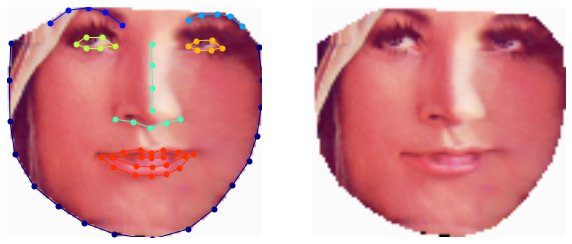

In [12]:
warped_lenna_to_takeo_pwa = lenna.as_unmasked(copy=False).warp_to_mask(takeo.mask, pwa_takeo_to_lenna)
warped_lenna_to_takeo_tps = lenna.as_unmasked(copy=False).warp_to_mask(takeo.mask, tps_takeo_to_lenna)
plt.subplot( 121 )
warped_lenna_to_takeo_pwa.view_landmarks();
plt.subplot( 122 )
warped_lenna_to_takeo_pwa.view(); #tps does not have landmarks
